# Sentimental Analysis for stock news of Amazon, Google and Facebook

In [61]:
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

### Using url of Financial Visualization (FinViz)

In [62]:
finviz_url="https://finviz.com/quote.ashx?t="
tickers=['AMZN','GOOG','FB']

In [63]:
news_tables={}
for ticker in tickers:
    url=finviz_url+ticker
    
    req=Request(url=url,headers={'user-agent':'my-app'})
    response=urlopen(req)
    #print(response)
    
    html=BeautifulSoup(response,'html')#html parser
    news_table=html.find(id='news-table')
    news_tables[ticker]=news_table
    #print(html)
    #break
    

In [64]:
#Only for amazon
amazon_data=news_tables['AMZN']
amazon_rows=amazon_data.findAll('tr')

for index, row in enumerate(amazon_rows):
    title=row.a.text
    timestamp=row.td.text
    print(timestamp + " " + title)

Jan-18-21 12:10PM   Why Amazon (AMZN) is Poised to Beat Earnings Estimates Again
11:50AM   Parler: How the social media site banned by Apple and Google came back online
10:01AM   10 best tablets for Zoom, gaming and films
09:13AM   Amazon-Backed Deliveroo Is Now Worth $7 Billion. An IPO Is on the Menu.
07:00AM   The pros and cons of putting your small business on Amazon
03:59AM   Amazon to open two new hubs in Italy this year
Jan-17-21 01:00PM   Amazon faces backlash from Indian ruling party lawmakers over web series 'Tandav'
06:41AM   15 Biggest Hosting Companies in the World
Jan-16-21 02:31PM   Billionaire Louis Bacon Shuns Bitcoin, Returns 70% By Betting On These Stocks
01:21PM   Biden eyes ex-Obama staff to tackle Big Tech and other antitrust issues
08:16AM   Billionaire-Backed Game Startup Kicks off Indias Tech IPO Rush
08:00AM   How Elon Musk and Jeff Bezos can help save our democracy
Jan-15-21 11:30PM   How Thanksgiving and Black Friday Affect Stocks
08:19PM   An Unusually High 

In [65]:
parsed_data=[]

for ticker,news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data=row.td.text.split(" ")
        
        if len(date_data)==1:
            time=date_data[0]
        else:
            date=date_data[0]
            time=date_data[1]
            
        parsed_data.append([ticker,date,time,title])
        print(parsed_data)  
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [66]:
df= pd.DataFrame(parsed_data,columns=['ticker','date','time','title'])
print(df)

    ticker       date       time  \
0     AMZN  Jan-18-21  12:10PM     
1     AMZN  Jan-18-21  11:50AM     
2     AMZN  Jan-18-21  10:01AM     
3     AMZN  Jan-18-21  09:13AM     
4     AMZN  Jan-18-21  07:00AM     
..     ...        ...        ...   
295     FB  Jan-12-21  08:45AM     
296     FB  Jan-12-21  08:07AM     
297     FB  Jan-12-21  08:00AM     
298     FB  Jan-12-21  06:02AM     
299     FB  Jan-12-21  04:25AM     

                                                 title  
0    Why Amazon (AMZN) is Poised to Beat Earnings E...  
1    Parler: How the social media site banned by Ap...  
2           10 best tablets for Zoom, gaming and films  
3    Amazon-Backed Deliveroo Is Now Worth $7 Billio...  
4    The pros and cons of putting your small busine...  
..                                                 ...  
295             What We Learned About Facebook in 2020  
296  2021 Is Moment of Reckoning for Social Media G...  
297  Here's How Much You're Worth To Social Media G...

In [67]:
import nltk
nltk.download('vader_lexicon')

vader=SentimentIntensityAnalyzer()
f = lambda title: vader.polarity_scores(title)['compound']
df['compound']=df['title'].apply(f)
#print(df.head())
df['date']=pd.to_datetime(df.date).dt.date

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<Figure size 1008x864 with 0 Axes>

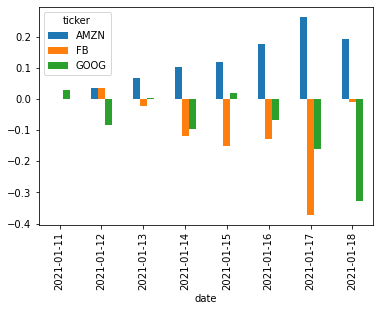

In [73]:
plt.figure(figsize=(14,12))
mean_df=df.groupby(['ticker','date']).mean()
#print(mean_df)
mean_df=mean_df.unstack()
mean_df=mean_df.xs('compound',axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()